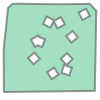

In [21]:
from randoor.generator import ObstacleRoomGenerator
o_generator = ObstacleRoomGenerator()
obs_room = o_generator.generate_new()
obs_room.get_freespace_poly()

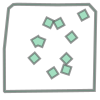

In [22]:
obs_room.get_collision_poly()

In [23]:
from randoor.spawner import geom
from randoor.spawner import poly
from shapely.geometry import Polygon
import numpy as np

p = Polygon(poly.get_square_horizon((0,0), 1, np.pi/4))
samples = geom.sample_from_faces([p, p], 1, 0.01)
samples

array([[[-0.91406017,  0.51267858]],

       [[ 1.27267945, -0.14958777]]])

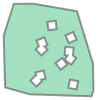

In [24]:
from randoor.generator import SimpleSearchRoomGenerator
ss_generator = SimpleSearchRoomGenerator()
ss_room = ss_generator.generate_new()
ss_room.get_freespace_poly()

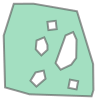

In [25]:
ss_room.get_freezone_poly()

In [26]:
ss_room.obstacle_count, ss_room.target_count

(10, 5)

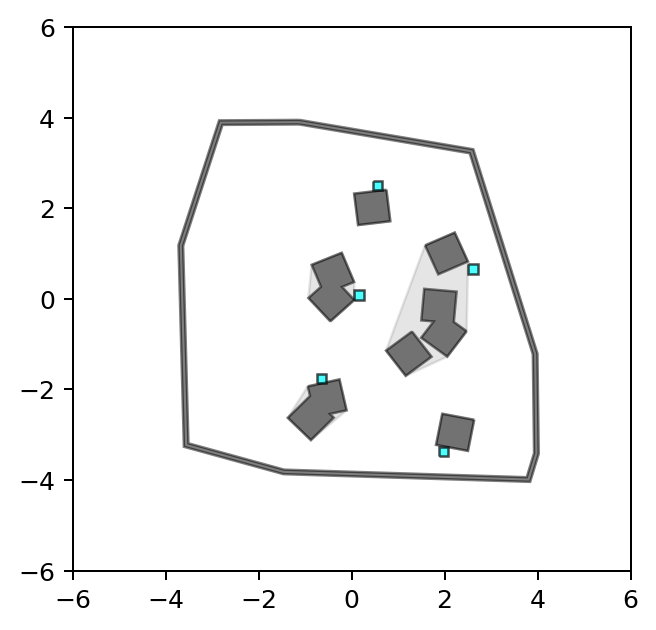

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from descartes import PolygonPatch
from shapely.ops import unary_union

fig = plt.figure(1, figsize=(4,4), dpi=180)
plt.xlim(-6,6)
plt.ylim(-6,6)
ax = fig.add_subplot(111)

wall = unary_union(ss_room.polygons[ss_room.tag_wall])
obstacles = unary_union(ss_room.polygons[ss_room.tag_obstacle])
targets = unary_union(ss_room.polygons[ss_room.tag_target])
zones = unary_union(ss_room.obstacle_hulls)

ax.add_patch(PolygonPatch(wall, fc='black', alpha=0.5, zorder=1))
ax.add_patch(PolygonPatch(obstacles, fc='black', alpha=0.5, zorder=2))
ax.add_patch(PolygonPatch(zones, fc='black', alpha=0.1, zorder=3))
ax.add_patch(PolygonPatch(targets, fc='cyan', alpha=0.7, zorder=4))

plt.show()

In [28]:
from randoor.generator import ChestSearchRoomGenerator
cs_generator = ChestSearchRoomGenerator()
cs_room = cs_generator.generate_new()

In [29]:
cs_room.obstacle_count, cs_room.target_count, cs_room.key_count

(10, 4, 4)

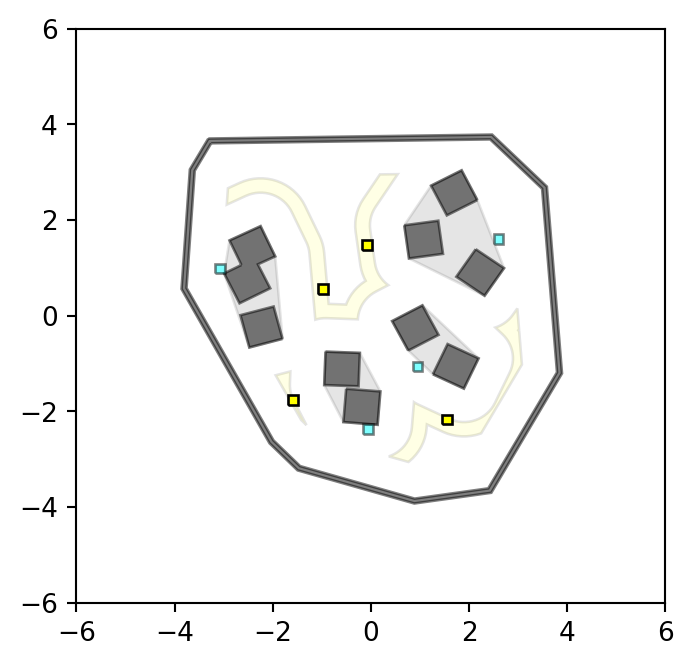

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from descartes import PolygonPatch
from shapely.ops import unary_union

fig = plt.figure(1, figsize=(4,4), dpi=190)
plt.xlim(-6,6)
plt.ylim(-6,6)
ax = fig.add_subplot(111)

wall = unary_union(cs_room.polygons[cs_room.tag_wall])
obstacles = unary_union(cs_room.polygons[cs_room.tag_obstacle])
targets = unary_union(cs_room.polygons[cs_room.tag_target])
keys = unary_union(cs_room.polygons[cs_room.tag_key])
obs_zones = unary_union(cs_room.obstacle_hulls)
key_zones = unary_union(cs_room.key_placing_area)

ax.add_patch(PolygonPatch(wall, fc='black', alpha=0.5, zorder=1))
ax.add_patch(PolygonPatch(obs_zones, fc='black', alpha=0.1, zorder=2))
ax.add_patch(PolygonPatch(obstacles, fc='black', alpha=0.5, zorder=3))
ax.add_patch(PolygonPatch(targets, fc='cyan', alpha=0.5, zorder=4))
ax.add_patch(PolygonPatch(key_zones, fc='yellow', alpha=0.1, zorder=5))
ax.add_patch(PolygonPatch(keys, fc='yellow', alpha=1, zorder=6))